## 問題
配布資料(FAtest.csv)は、ある大学で、日常の情報源として使用している頻度を、①Webニュース(web)、②動画サイト(video)、③SNS(sns)、④新聞(newspaper)、⑤書籍や雑誌(book)、⑥テレビ(tv)、の6つを対象として調査した結果である(10段階からなる相対評価)。この6変数を元に因子分析を実施し、以下について解答しなさい。
　なお、固有値1以上の因子を抽出し、抽出方法は最尤法、回転はプロマックス回転とすること。

In [3]:
from factor_analyzer import FactorAnalyzer
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('FAtest.csv')
df.head()

,web,video,sns,newspaper,book,tv
0,4,8,2,5,8,4
1,6,6,4,4,5,4
2,5,6,3,3,4,3
3,6,8,4,5,7,5
4,5,5,2,5,6,5


In [5]:
# 基本統計量
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,web,video,sns,newspaper,book,tv
count,301,301,301,301,301,301
mean,5.35216,6.46179,3.70764,5.3887,6.70432,4.60797
std,1.22566,1.21766,1.21143,1.18254,1.325,1.14272
min,1,3,2,3,3,3
25%,5,6,3,5,6,4
50%,5,6,4,5,7,4
75%,6,7,5,6,8,5
max,9,10,6,9,9,9


In [6]:
# pandasのplottingメソッドをインポート
from pandas import plotting

array([[<AxesSubplot:xlabel='web', ylabel='web'>,
        <AxesSubplot:xlabel='video', ylabel='web'>,
        <AxesSubplot:xlabel='sns', ylabel='web'>,
        <AxesSubplot:xlabel='newspaper', ylabel='web'>,
        <AxesSubplot:xlabel='book', ylabel='web'>,
        <AxesSubplot:xlabel='tv', ylabel='web'>],
       [<AxesSubplot:xlabel='web', ylabel='video'>,
        <AxesSubplot:xlabel='video', ylabel='video'>,
        <AxesSubplot:xlabel='sns', ylabel='video'>,
        <AxesSubplot:xlabel='newspaper', ylabel='video'>,
        <AxesSubplot:xlabel='book', ylabel='video'>,
        <AxesSubplot:xlabel='tv', ylabel='video'>],
       [<AxesSubplot:xlabel='web', ylabel='sns'>,
        <AxesSubplot:xlabel='video', ylabel='sns'>,
        <AxesSubplot:xlabel='sns', ylabel='sns'>,
        <AxesSubplot:xlabel='newspaper', ylabel='sns'>,
        <AxesSubplot:xlabel='book', ylabel='sns'>,
        <AxesSubplot:xlabel='tv', ylabel='sns'>],
       [<AxesSubplot:xlabel='web', ylabel='newspaper'>,
     

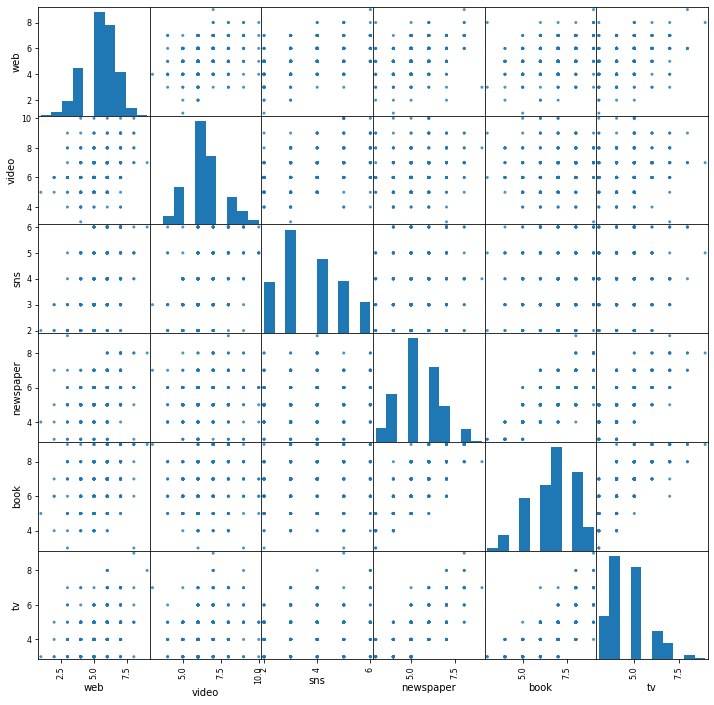

In [7]:
# 散布図行列を表示
plotting.scatter_matrix(df, figsize=(12, 12), alpha=0.8)


### 問1
各項目が関連付けられる因子(因子負荷量が|0.4|以上)を解答しなさい。1つ目の因子なら1、2つ目の因子なら2、3つ目の因子なら3、いずれの因子も関連付けられない場合は0と解答すること。

### 問2
問題①で関連付けた因子に対する因子負荷量を解答しなさい。小数点は3桁まで(4桁目を四捨五入)、問題①で0と解答した項目は0と解答すること。

In [19]:
# 変数の標準化
df_std = df.apply(lambda x: (x-x.mean())/x.std(), axis=0)

In [22]:
# 因子分析の実行
fa = FactorAnalyzer(n_factors=2, rotation="promax")
fa.fit(df_std)


FactorAnalyzer(n_factors=2, rotation_kwargs={})

In [24]:
# 因子負荷量，共通性
loadings_df = pd.DataFrame(fa.loadings_, columns=["第１因子", "第２因子"])
loadings_df.index = df.columns
loadings_df["共通性"] = fa.get_communalities()
loadings_df


,第１因子,第２因子,共通性
web,0.188632,0.531811,0.318405
video,-0.003223,0.470571,0.221448
sns,-0.140878,0.784733,0.635652
newspaper,0.827500,0.015698,0.685002
book,0.912886,-0.107520,0.844921
tv,0.779691,0.050515,0.610471
